# **Taller 6 - Parte 1**


1.  **Número óptimo de clusters:** Basados en el ejercicio del dataset de Iris y la aplicación de los 4 métodos para determinar el número óptimo de cluster, ¿Qué número de clusters les sugiere cada uno de los gráficos? ¿Son coherentes con el número de especies en el dataset?. Discute sobre el resultado indicado por cada método.
2.   **Impacto de la normalización de datos:** ¿Cómo afecta la normalización de los datos al rendimiento del algoritmo k-means? Aplica k-means al dataset sin normalización y luego con normalización usando StandardScaler. ¿Qué diferencias encuentras en el número de iteraciones, la precisión (si se compara con etiquetas reales) y la estabilidad de los clusters?. Deben implementar k-means en ambas versiones del dataset (normalizado y no normalizado) y comparar los resultados en cuanto a tiempo de ejecución, número de iteraciones y precisión.
3.   **Uso de diferentes métricas de distancia:** K-means utiliza la distancia euclidiana por defecto, pero ¿cómo afecta el uso de otras métricas de distancia, como la distancia de Manhattan o la de Coseno? Implementa k-means utilizando al menos dos métricas de distancia adicionales y compara los resultados en cuanto a la coherencia de los clusters y el tiempo de ejecución. Deben modificar el algoritmo k-means o usar librerías que permitan el uso de métricas de distancia diferentes y realizar una evaluación de las diferencias en la agrupación de datos, tiempo de ejecución y número de iteraciones.
4.   **Comparación de tiempo de ejecución con diferentes inicializaciones:** K-means puede ser sensible a las inicializaciones. ¿Cómo afecta el número de inicializaciones aleatorias (n_init) al tiempo de ejecución y al resultado final de los clusters? Prueba con n_init=1, n_init=10 y n_init=100. Deben implementar k-means con diferentes valores de n_init y analizar el impacto en tiempo de ejecución, estabilidad de los clusters y calidad de los resultados (usando métricas como el coeficiente de silueta o la distancia intra-cluster).


In [1]:
# Instalar librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn_extra.cluster import KMedoids
from scipy.spatial.distance import cdist
import warnings 
%matplotlib inline
# Para ocultar los warnings de la gestion de memoria del kmeans
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
# Cargar el dataset de Iris
iris = load_iris()
X = iris.data

In [17]:
# Ver nombre y la cantidad de especies
print("Nombres de las especies:", iris.target_names)
print("Cantidad de especies:", len(iris.target_names))

Nombres de las especies: ['setosa' 'versicolor' 'virginica']
Cantidad de especies: 3


Como podemos observar el dataset de Iris tiene 3 especies diferentes (Setosa, Versicolor y Virginica), por lo que esperamos que los métodos de determinación del número óptimo de clusters sugieran un valor cercano a 3.

In [3]:
# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Metodos para determinar el numero optimo de clusters

## Metodo del Codo de Jambú

In [6]:
# 1. Método del Codo de Jambú
def plot_elbow_method(X):
    distortions = []
    K = range(1, 10)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        distortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    plt.figure(figsize=(6, 4))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('Número de clusters (k)')
    plt.ylabel('Distorsión')
    plt.title('Método del Codo de Jambú')
    plt.show()

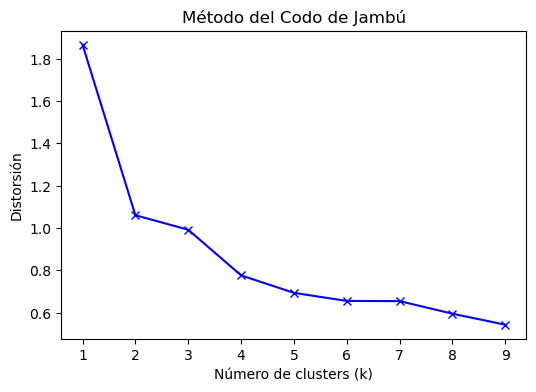

In [8]:
# Llamar a la función para mostrar el gráfico de codo
plot_elbow_method(X_scaled)

EL grafico nos sugiere que el numero optimo de clusters se ubica alrededor de 2 o 3, teniendo en cuenta que a partir de ese punto la disminución en la inercia es menos pronunciada por ende la dispersion dentro de cada clusters es menor en estos puntos. Por lo tanto, esta informacion es coherente con el numero de especies en el dataset que es 3.

In [10]:
# 2. Coeficiente de Silueta
def plot_silhouette_scores(X):
    silhouette_scores = []
    K = range(2, 10)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        silhouette_scores.append(silhouette_score(X, kmeans.labels_))
    plt.figure(figsize=(6, 4))
    plt.plot(K, silhouette_scores, 'bx-')
    plt.xlabel('Número de clusters (k)')
    plt.ylabel('Coeficiente de Silueta')
    plt.title('Coeficiente de Silueta')
    plt.show()

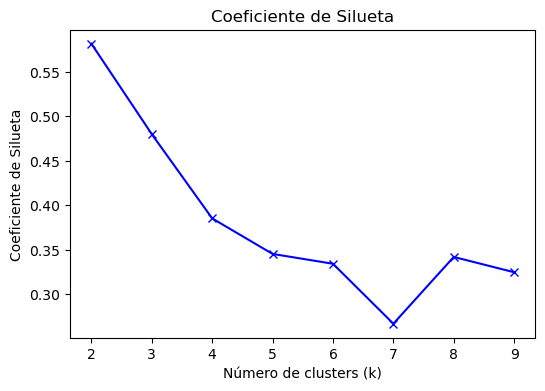

In [11]:
# Funcion para mostrar el gráfico de Silueta
plot_silhouette_scores(X_scaled)

El grafico del coeficiente de silueta nos sugiere que el numero optimo de clusters es de 3, sin embargo, existe una separacion menor cuando se consideran 2 clusters. Por lo tanto, esta informacion es coherente con el numero de especies en el dataset que es 3.


In [12]:
# 3. Índice de Davies-Bouldin
def plot_davies_bouldin_scores(X):
    db_scores = []
    K = range(2, 10)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        db_scores.append(davies_bouldin_score(X, kmeans.labels_))
    plt.figure(figsize=(6, 4))
    plt.plot(K, db_scores, 'bx-')
    plt.xlabel('Número de clusters (k)')
    plt.ylabel('Índice de Davies-Bouldin')
    plt.title('Índice de Davies-Bouldin')
    plt.show()

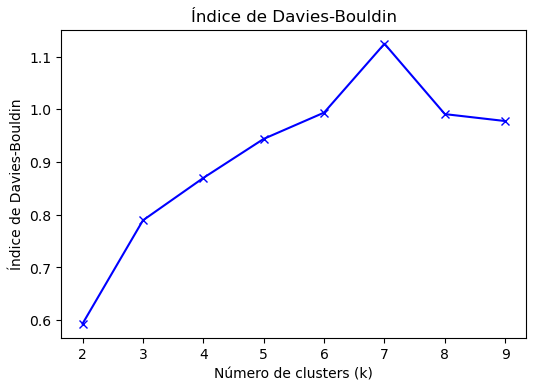

In [13]:
# Funcion para mostrar el gráfico
plot_davies_bouldin_scores(X_scaled)

Teniendo en cuenta el grafico del indice de Davies-Bouldin, podemos observar que un numero aceptable de clusters seria entre 2 y 3, ya que la separacion entre clusters es mayor en estos puntos. Por lo tanto, esta informacion es coherente con el numero de especies en el dataset que es 3.

In [14]:
# 4. Índice de Dunn
def calculate_dunn_index(X, labels):
    distances = cdist(X, X, metric='euclidean')
    inter_cluster_distances = []
    intra_cluster_distances = []

    for i in range(np.max(labels) + 1):
        points_in_cluster = np.where(labels == i)[0]
        if len(points_in_cluster) > 1:
            intra_cluster_distances.append(np.mean(distances[np.ix_(points_in_cluster, points_in_cluster)]))

    for i in range(np.max(labels) + 1):
        for j in range(i + 1, np.max(labels) + 1):
            points_in_cluster_i = np.where(labels == i)[0]
            points_in_cluster_j = np.where(labels == j)[0]
            inter_cluster_distances.append(np.mean(distances[np.ix_(points_in_cluster_i, points_in_cluster_j)]))

    return np.min(inter_cluster_distances) / np.max(intra_cluster_distances)

def plot_dunn_index(X):
    dunn_scores = []
    K = range(2, 10)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        dunn_scores.append(calculate_dunn_index(X, kmeans.labels_))
    plt.figure(figsize=(6, 4))
    plt.plot(K, dunn_scores, 'bx-')
    plt.xlabel('Número de clusters (k)')
    plt.ylabel('Índice de Dunn')
    plt.title('Índice de Dunn')
    plt.show()

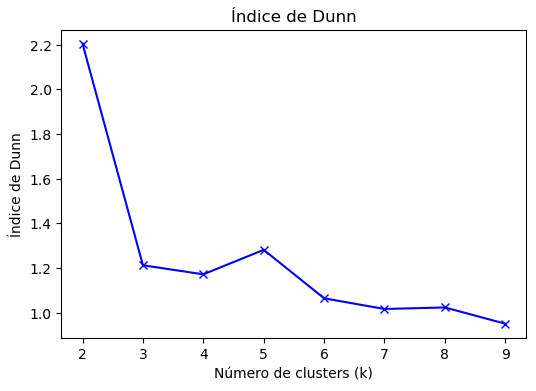

In [15]:
# Funcion para mostrar el grafico
plot_dunn_index(X_scaled)

El grafico del indice de Dunn nos sugiere que un numero optimo de clusters seria entre 2 y 3, ya que la separacion entre clusters es mayor en estos puntos (teniendo en cuenta que el grafico se estabiliza despues de 3). Por lo tanto, esta informacion es coherente con el numero de especies en el dataset que es 3.

In [ ]:
# KMeans con datos normalizados X_scaled

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
print("Etiquetas de los clusters:", labels)
print("Centroides de los clusters:", centroids)

Etiquetas de los clusters: [1 2 2 2 1 1 1 1 2 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 2 1 1 1 2 2 1
 1 2 1 1 2 2 1 1 2 1 2 1 1 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
Centroides de los clusters: [[ 0.57100359 -0.37176778  0.69111943  0.66315198]
 [-0.81623084  1.31895771 -1.28683379 -1.2197118 ]
 [-1.32765367 -0.373138   -1.13723572 -1.11486192]]


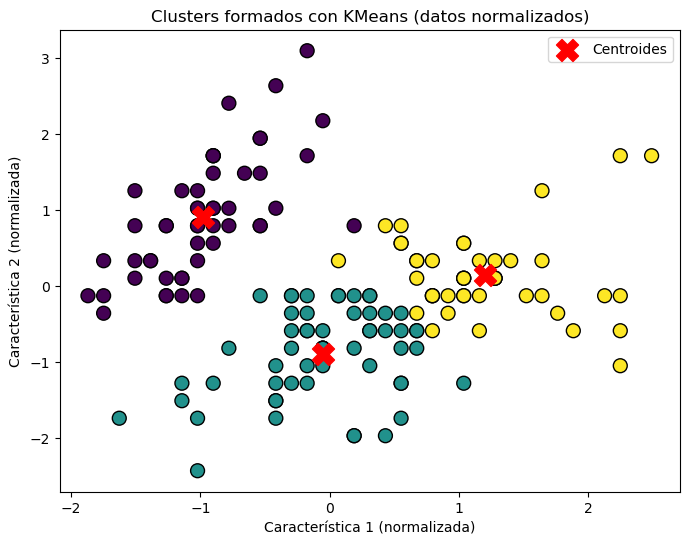

In [30]:
# Graficar scatter plot de los clusters de kmeans con los todos los datos normalizados

# 1) Entrenar KMeans en el mismo espacio que vas a graficar (2 columnas normalizadas)
X_plot = X_scaled[:, :2]  # solo característica 1 y 2 normalizadas

k = 3
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
labels = kmeans.fit_predict(X_plot)          # etiquetas por punto [web:27]
centroids = kmeans.cluster_centers_          # centroides en el mismo espacio [web:27]

# 2) Graficar puntos y centroides
plt.figure(figsize=(8, 6))
plt.scatter(X_plot[:, 0], X_plot[:, 1], c=labels, cmap='viridis',
            marker='o', edgecolors='k', s=100)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red',
            marker='X', s=250, label='Centroides')
plt.xlabel('Característica 1 (normalizada)')
plt.ylabel('Característica 2 (normalizada)')
plt.title('Clusters formados con KMeans (datos normalizados)')
plt.legend()
plt.show()


In [24]:
# Kmeans con datos sin normalizar X
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
print("Etiquetas de los clusters (sin normalizar):", labels)
print("Centroides de los clusters (sin normalizar):", centroids)

Etiquetas de los clusters (sin normalizar): [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
Centroides de los clusters (sin normalizar): [[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.006      3.428      1.462      0.246     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]]


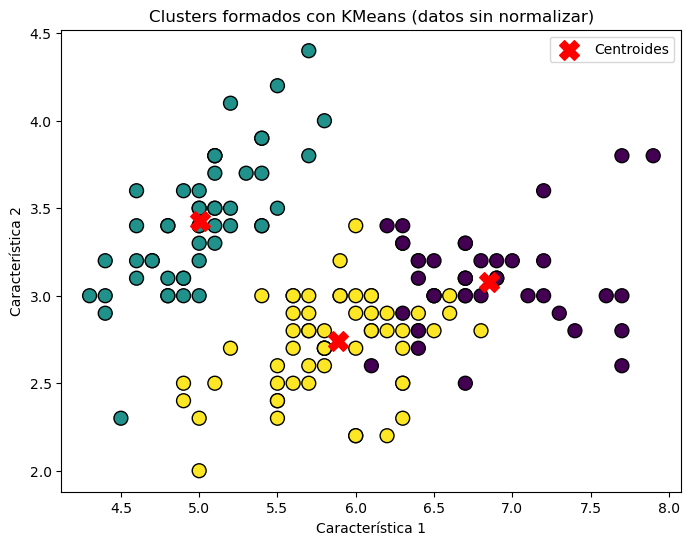

In [27]:
# Graficar scatter plot de los clusters formados con kmeans teniendo los datos sin normalizar
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=100)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroides')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Clusters formados con KMeans (datos sin normalizar)')
plt.legend()
plt.show()